In [1]:
import dgl
import json
import torch
import networkx as nx
from rich import console
console = console.Console()

In [2]:
import unionfind.gpu
from unionfind import utils
import importlib
importlib.reload(unionfind.gpu)
d = 11
r = 10

dgl_graph = dgl.load_graphs('g1.bin')[0][0]
g = unionfind.gpu.dgl_to_networkx(dgl_graph)

# with open('./bench/edge_weights.json', 'r') as f:
#     weights = json.load(f)
# g = utils.gene_rep_decoding_graph(d, r, **weights)


decoder_gpu = unionfind.gpu.GPUUFDecoder(g, d, r)

c:\Users\zhy\miniconda3\Lib\site-packages\dgl\backend\pytorch\tensor.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  return th.as_tensor(data, dtype=dtype)


**Growing**

In [3]:
num_epochs = 0

───────────────────────────────────────────────────── Epoch 5 ─────────────────────────────────────────────────────

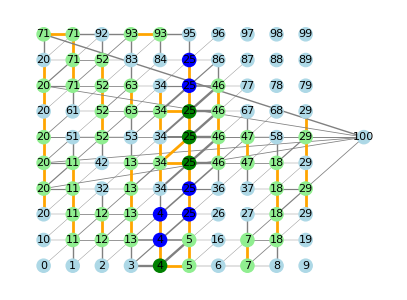

In [38]:
num_epochs += 1
console.rule('Epoch {}'.format(num_epochs))
decoder_gpu.grow()
_ = decoder_gpu.visualize_intermediate_result_graph()

**Merging & checking**

In [39]:
inner_epoch = 0

──────────────────────────────────────────── Epoch 5 (inner epoch 12) ─────────────────────────────────────────────

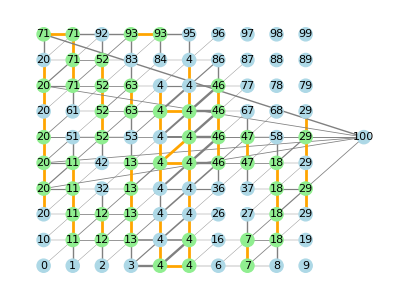

In [51]:
inner_epoch += 1
console.rule('Epoch {} (inner epoch {})'.format(num_epochs, inner_epoch))
decoder_gpu.merge_dgl()
decoder_gpu.check()
_ = decoder_gpu.visualize_intermediate_result_graph()

In [8]:
torch.any(decoder_gpu.dgl_graph.ndata['odd'])

tensor(True)